In [ ]:
# Python for GIS - Geopandas (I)
# Our tutorial: https://gist.github.com/jorisvandenbossche/7b30ed43366a85af8626
#
# %matplotlib is a magic function in IPython. I'll quote the relevant documentation here for you to read for convenience:
# IPython has a set of predefined ‘magic functions’ that you can call with a command line style syntax. There are two kinds of magics, line-oriented and cell-oriented. Line magics are prefixed with the % character and work much like OS command-line calls: they get as an argument the rest of the line, where arguments are passed without parentheses or quotes. Lines magics can return results and can be used in the right hand side of an assignment. Cell magics are prefixed with a double %%, and they are functions that get as an argument not only the rest of the line, but also the lines below it in a separate argument.
# "%matplotlib inline" sets the backend of matplotlib to the 'inline' backend, so the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [81]:
#Set setting to display a max of 4 rows when calling df/shapefile
pd.options.display.max_rows = 4

In [3]:
from matplotlib import pyplot as plt

In [7]:
# Import earthpy to use for reprojecting data; conda install -c conda-forge earthpy see https://pypi.org/project/earthpy/

In [7]:
import earthpy as et
import geopandas

In [8]:
# use downloaded shp data from Blackboard or from original source: http://www.eea.europa.eu/data-and-maps/data/urban-atlas
# we are using the older version of the data, and example data for Antwerp, which works works with our tutorial: https://gist.github.com/jorisvandenbossche/7b30ed43366a85af8626

In [8]:
#Read in shapefile dataset
data = geopandas.read_file("/Users/sandeepk/Desktop/SSCI-581/Project3Data/landuse.shp")

In [9]:
# Identify the coordinate system
print(data.crs)

epsg:31370


In [10]:
#Drop first row -- unneeded data
data = data.drop(0)

In [11]:
#View first 3 rows of shapefile dataset
data.head(3)

,CITIES,LUZ_OR_CIT,CODE,ITEM,PROD_DATE,SHAPE_LEN,SHAPE_AREA,geometry
1,Antwerpen,BE002L,12220,Other roads and associated land,2009,8.223079e+06,3.416457e+07,"POLYGON ((161231.896 240628.018, 161222.220 24..."
2,Antwerpen,BE002L,11230,Discontinuous Low Density Urban Fabric (S.L. :...,2009,2.737507e+02,2.297339e+03,"POLYGON ((161767.009 241277.756, 161767.480 24..."
3,Antwerpen,BE002L,30000,Forests,2009,4.402571e+03,3.656241e+05,"POLYGON ((161767.009 241277.756, 161745.219 24..."


In [88]:
#Area -- subset of geometry column
data.geometry.area

1        3.418716e+07
2        2.299096e+03
             ...     
16979    2.243158e+04
16980    1.568410e+04
Length: 16980, dtype: float64

City: Antwerpen
Item: Forests
Area: 365903.6913


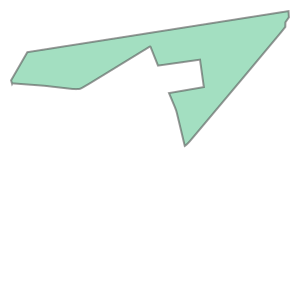

In [89]:
#View information + area and shape of x row

def geometries(row):    
    print(f'City: {data.CITIES[row]}')    
    print(f'Item: {data.ITEM[row]}')
    print(f'Area: {data.geometry.area[row]:.4f}')
    return data.geometry.loc[row]

geometries(3)

<AxesSubplot:>

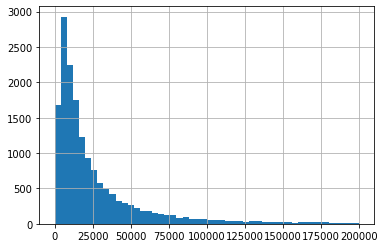

In [14]:
#Histogram distribution of geometrical areas 
data.geometry.area.hist(bins=50, range=(0,0.2e6))

In [26]:
data.ITEM.value_counts()

Industrial, commercial, public, military and private units      2835
Discontinuous Dense Urban Fabric (S.L. : 50% -  80%)            2084
Discontinuous Medium Density Urban Fabric (S.L. : 30% - 50%)    1981
Continuous Urban Fabric (S.L. > 80%)                            1971
Discontinuous Low Density Urban Fabric (S.L. : 10% - 30%)       1867
Agricultural + Semi-natural areas + Wetlands                    1855
Forests                                                          920
Discontinuous Very Low Density Urban Fabric (S.L. < 10%)         875
Isolated Structures                                              717
Port areas                                                       490
Sports and leisure facilities                                    280
Green urban areas                                                258
Water bodies                                                     244
Land without current use                                         213
Railways and associated land      

In [35]:
bounds = data.bounds
bounds

,minx,miny,maxx,maxy
1,141781.493728,195674.470312,176199.833567,241374.894822
2,161767.008795,241277.756217,161843.013222,241373.354296
3,160267.123357,240626.522376,161786.524770,241364.139600
4,161548.287117,239724.717674,162552.441547,241289.002168
5,160719.231178,240948.491648,161041.139643,241163.025659
...,...,...,...,...
16976,153793.467916,196018.306124,153899.786089,196116.536375
16977,154035.373316,195935.639518,154149.748470,196107.984612
16978,155402.028241,195764.770734,155593.943259,196062.606770
16979,155399.888716,195672.890896,155957.076617,195955.561741


In [36]:
#Fileter bounds row to only include those bounds in the shapefile where the 3 below conditions are true
data = data[((bounds['minx'] < 160000) & (bounds['maxx'] > 150000) & (bounds['miny'] < 215000) & (bounds['maxy'] > 208000))]

In [37]:
#Fileter Item row to exclude Water bodies from shapefile
data = data[data['ITEM'] != 'Water bodies']

In [38]:
# Import descartes to use for plotting polygons in geopandas
import descartes

(208000.0, 215000.0)

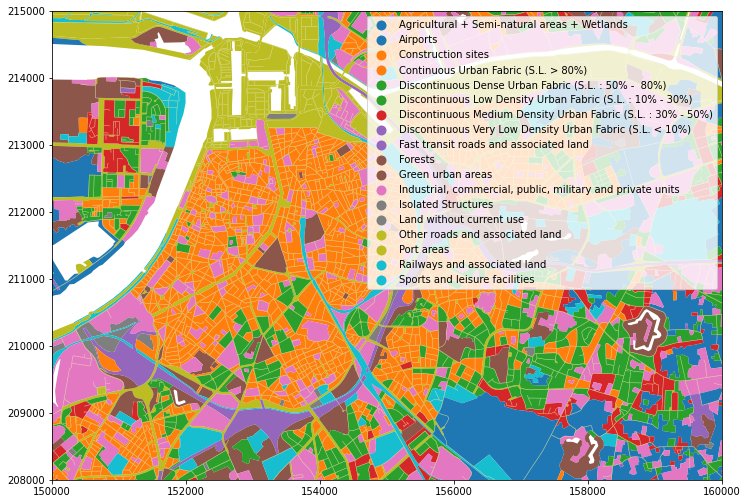

In [39]:
#Plot polygons of different items and label a corresponding legend
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
data.plot(column='ITEM', legend=True, ax=ax)
ax.set_xlim(150000, 160000)
ax.set_ylim(208000, 215000)

In [40]:
#hold data including only green urban areas in a seperate variable - green_acres
green_areas = data[data['ITEM']=='Green urban areas']

In [41]:
streets = geopandas.read_file("/Users/sandeepk/Desktop/SSCI-581/Project3Data/layer_streets.shp")

In [102]:
#Recieve coordinate system
strs = (streets.crs) 
print(streets.crs)

epsg:31370


In [108]:
#View number of rows and columns
streets.shape

(22491, 2)

In [25]:
# To display these together, or perform a spatial analysis, do any layers need to be reprojected?...i.e. see https://www.earthdatascience.org/workshops/gis-open-source-python/reproject-vector-data-in-python/
# NO - HOMOGENEOUS COORDINATE SYSTEM

In [109]:
# view the spatial extent of both layers 
print(data.total_bounds)
print(streets.total_bounds)

[141781.49372781 195674.47031193 176199.83356685 241374.89482236]
[141709.72170266 203857.67930245 163720.86294721 223753.51469011]


In [27]:
# reproject the streets layer i.e. using the EPSG code? If they are the same projection, you don't need to reproject one.

#streets_reprojected  = data.to_crs({'init': 'epsg:3035'}) # still works but give a warning; see https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6 - can you fix it?

In [110]:
# view the spatial extent of both layers again 
print(data.total_bounds)
# print(streets_reprojected.total_bounds)

[141781.49372781 195674.47031193 176199.83356685 241374.89482236]


(208000.0, 215000.0)

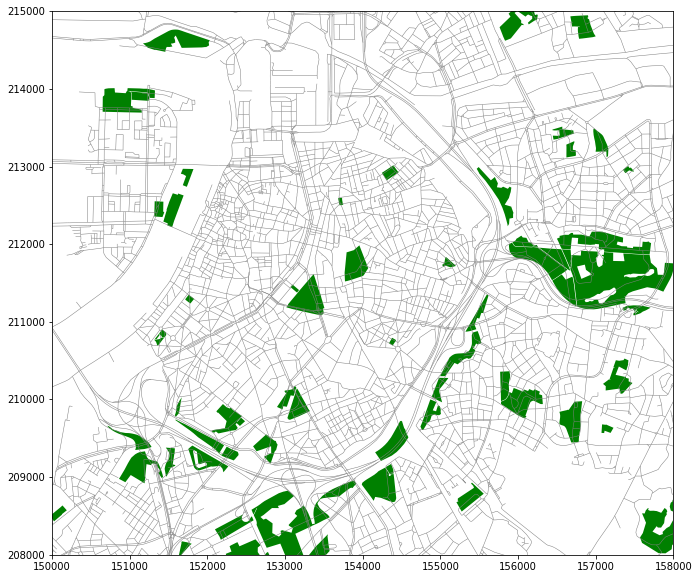

In [111]:
#PLOT STREETS AND GREEN AREAS -LEVERAGING DESCARTES AND MATPLOTLIB
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
streets.plot(ax=ax, color="grey", linewidth=0.5)
green_areas.plot(ax=ax, color='green')

#COVER ALL BOUNDARIES OF BOTH SHAPEFILES INCPORPORATED IN THE ANALYSTS
ax.set_xlim(150000, 158000)
ax.set_ylim(208000, 215000)

(208000.0, 215000.0)

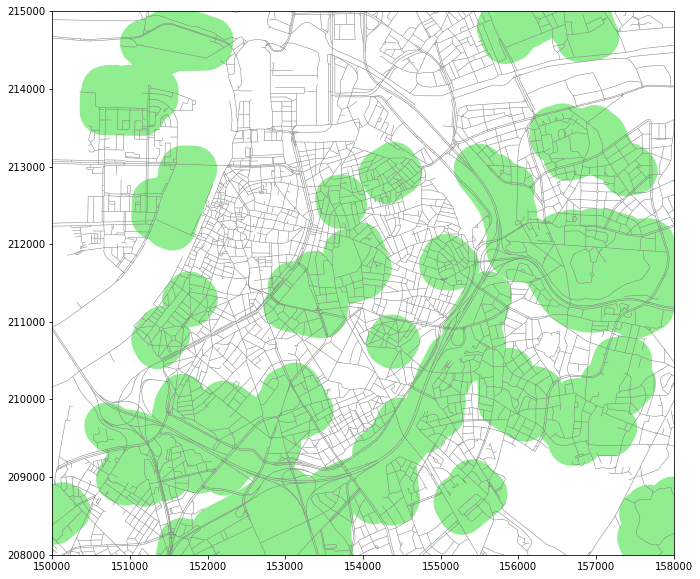

In [31]:
# plot geometry a 300 meter buffer of the green areas (light-green) with the streets (grey)
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
streets.plot(ax=ax, color="grey", linewidth=0.5)
green_areas.geometry.buffer(300).plot(ax=ax, color='lightgreen')
ax.set_xlim(150000, 158000)
ax.set_ylim(208000, 215000)

In [112]:
addresses = geopandas.read_file("/Users/sandeepk/Desktop/SSCI-581/Project3Data/CRAB_subset.shp")

In [113]:
print(addresses.crs)

epsg:31370


In [114]:
# view the spatial extent of all 3 layers 
print(data.total_bounds)
print(streets.total_bounds)
print(addresses.total_bounds)

[141781.49372781 195674.47031193 176199.83356685 241374.89482236]
[141709.72170266 203857.67930245 163720.86294721 223753.51469011]
[150983.43044025 208801.66634058 156024.30044036 214061.0263407 ]


In [35]:
# do you need to reproject the addresses to match the streets layers ? ...i.e. using the EPSG code; still works but gives a warning - can you fix it?
# addresses_reprojected  = data.to_crs({'init': 'epsg:3035'})

#NO = homogenous coordinate system

In [36]:
# view the spatial extent of all 3 layers 
print(data.total_bounds)
print(streets.total_bounds)
print(addresses.total_bounds)

[141781.49372781 195674.47031193 176199.83356685 241374.89482236]
[141709.72170266 203857.67930245 163720.86294721 223753.51469011]
[150983.43044025 208801.66634058 156024.30044036 214061.0263407 ]


In [115]:
#through a lambda function hold only the x values of the geometry column in x var 
#through a lambda function hold only the y values of the geometry column in y var 
x = addresses.geometry.apply(lambda p: p.x)
y = addresses.geometry.apply(lambda p: p.y)
print(x,y)

0        153489.27044
1        153388.82044
             ...     
56039    154319.81044
56040    151301.89044
Name: geometry, Length: 56041, dtype: float64 0        210071.496341
1        210911.296341
             ...      
56039    211782.986341
56040    210677.107341
Name: geometry, Length: 56041, dtype: float64


In [116]:
#Store only c values between and y values that classify as True for the below conditions in addresses var
addresses = addresses[(x < 156000).values & (x > 152000) .values & (y < 213000) .values & (y > 210000) .values]

(210000.0, 213000.0)

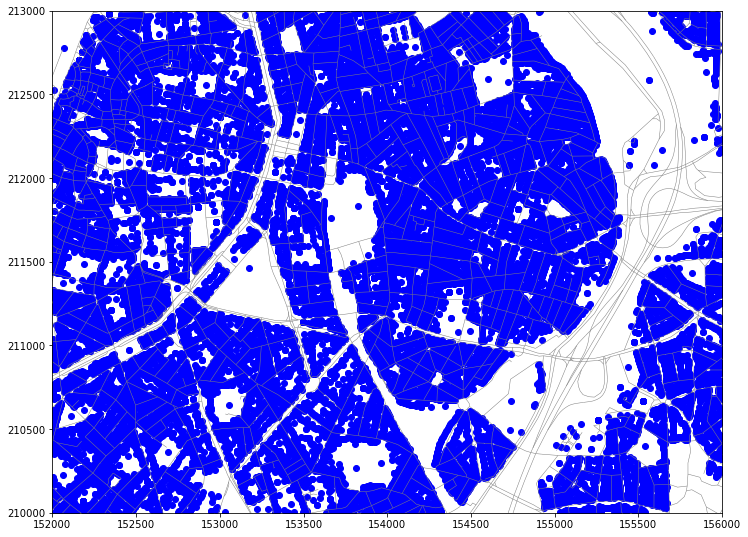

In [39]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
streets.plot(ax=ax, color="grey", linewidth=0.5)
addresses.plot(ax=ax, color='blue')
ax.set_xlim(152000, 156000)
ax.set_ylim(210000, 213000)

In [40]:
# Question: what is the distance to the nearest green area for all adresses?

In [41]:
urban_green = data[(data['ITEM']=='Green urban areas') & (data.geometry.area > 10000)]

In [42]:
def urban_green_dist(point, urban_green):
    return urban_green.geometry.distance(point).min()

In [43]:
min_distance = addresses.geometry.apply(lambda x: urban_green_dist(x, urban_green))

In [44]:
addresses['min_distance'] = min_distance

C:\Anaconda3_2020\envs\SSCI586Fall20\lib\site-packages\geopandas\plotting.py:558: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


(210000.0, 213000.0)

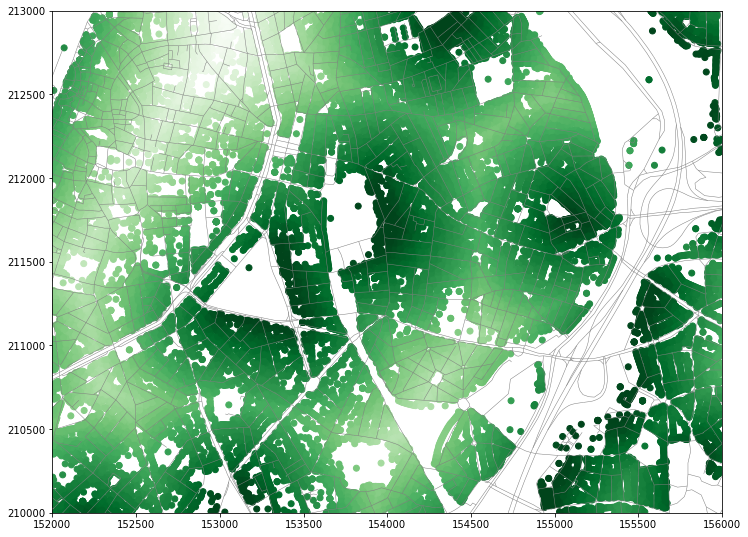

In [46]:
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'aspect':'equal'})
streets.plot(ax=ax, color="grey", linewidth=0.5)
addresses.plot(ax=ax, column='min_distance', colormap='Greens_r')
ax.set_xlim(152000, 156000)
ax.set_ylim(210000, 213000)

<AxesSubplot:>

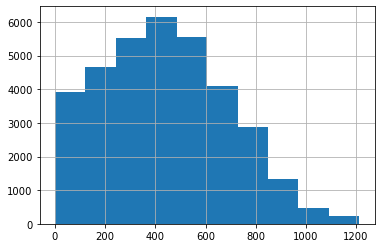

In [47]:
addresses['min_distance'].hist()

## Own Data
- shapefile

In [43]:
#Read in Data
austria_df = geopandas.read_file('/Users/sandeepk/Desktop/SSCI-581/geopandas_intro/at004l_salzburg/at004l_salzburg.shp')

In [44]:
#view dataframe
austria_df.head(3)

,CITIES,LUZ_OR_CIT,CODE,ITEM,PROD_DATE,SHAPE_LEN,SHAPE_AREA,geometry
0,Salzburg,AT004L,11100,Continuous Urban Fabric (S.L. > 80%),2011,512.455720,8237.086640,"POLYGON ((4579517.892 2716932.807, 4579516.674..."
1,Salzburg,AT004L,11100,Continuous Urban Fabric (S.L. > 80%),2011,211.305698,2055.092751,"POLYGON ((4579515.023 2717150.222, 4579516.370..."
2,Salzburg,AT004L,11100,Continuous Urban Fabric (S.L. > 80%),2011,335.759821,6159.067908,"POLYGON ((4572775.612 2722409.005, 4572771.450..."


In [156]:
#View unique categories
austria_df['ITEM'].unique()

array(['Continuous Urban Fabric (S.L. > 80%)',
       'Discontinuous Medium Density Urban Fabric (S.L. : 30% - 50%)',
       'Discontinuous Low Density Urban Fabric (S.L. : 10% - 30%)',
       'Sports and leisure facilities',
       'Discontinuous Dense Urban Fabric (S.L. : 50% -  80%)',
       'Agricultural + Semi-natural areas + Wetlands',
       'Isolated Structures', 'Forests', 'Construction sites',
       'Discontinuous Very Low Density Urban Fabric (S.L. < 10%)',
       'Industrial, commercial, public, military and private units',
       'Green urban areas', 'Land without current use',
       'Other roads and associated land',
       'Fast transit roads and associated land',
       'Railways and associated land',
       'Mineral extraction and dump sites', 'Airports', 'Water bodies'],
      dtype=object)

In [103]:
#Partition Data
austria_water = austria_df[austria_df['ITEM'] == 'Water bodies']
aus_green = austria_df.apply(lambda row: row[austria_df['ITEM'].isin\
                                             (['Agricultural + Semi-natural areas + Wetlands',
                                              'Green urban areas', 'Forests'])])

aus_streets = austria_df.apply(lambda row: row[austria_df['ITEM'].isin\
                                               (['Other roads and associated land'])])

<AxesSubplot:>

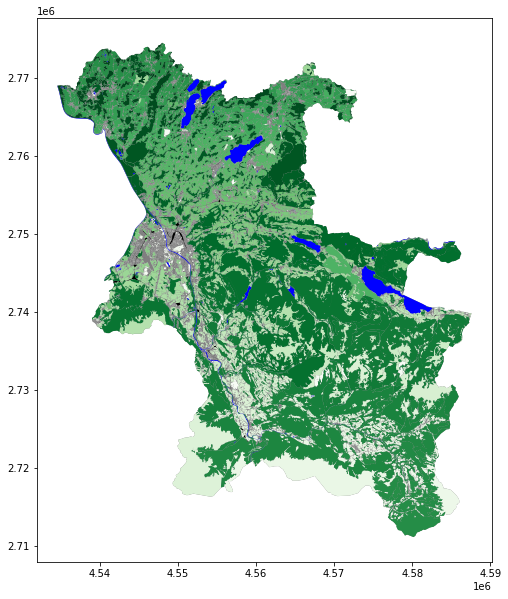

In [120]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
austria_df.plot(ax=ax, color="grey", linewidth=0.5)
austria_water.plot(ax=ax, color="blue", linewidth=0.5)
aus_streets.plot(ax=ax, color="black", linewidth=0.5)
aus_green.plot(ax=ax, cmap="Greens", linewidth=0.5, legend=True)

<AxesSubplot:>

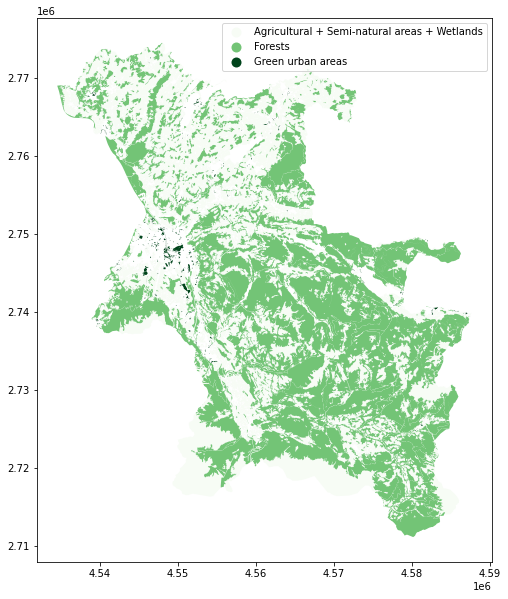

In [145]:
#GREENERY IN AYSTRUA
fig, ax = plt.subplots(1,1)
fig.set_figheight(10)
fig.set_figwidth(10)
aus_green.plot(column='ITEM', ax=ax, cmap="Greens", linewidth=0.5, legend=True)

Area = 12185104.31


Text(0.5, 1.0, 'Largest Water Body in Austria')

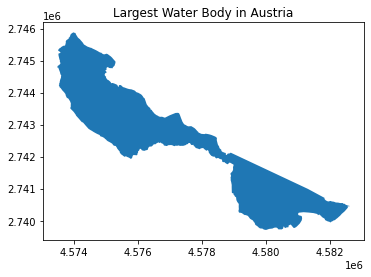

In [197]:
print('Area =', max(austria_water['geometry'].area.round(2)))
austria_water[austria_water['geometry'].area == max(austria_water['geometry'].area)].plot()
plt.title('Largest Water Body in Austria')

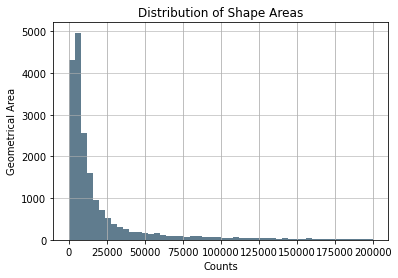

In [210]:
#BUFFER
#Histogram distribution of geometrical areas 
austria_df.geometry.area.hist(grid=True, bins=50, range=(0,0.2e6), color='#607c8e')
plt.title('Distribution of Shape Areas')
plt.xlabel('Counts')
plt.ylabel('Geometrical Area')
plt.grid(axis='y', alpha=0.75)

In [211]:
austria_df

,CITIES,LUZ_OR_CIT,CODE,ITEM,PROD_DATE,SHAPE_LEN,SHAPE_AREA,geometry
0,Salzburg,AT004L,11100,Continuous Urban Fabric (S.L. > 80%),2011,512.455720,8237.086640,"POLYGON ((4579517.892 2716932.807, 4579516.674..."
1,Salzburg,AT004L,11100,Continuous Urban Fabric (S.L. > 80%),2011,211.305698,2055.092751,"POLYGON ((4579515.023 2717150.222, 4579516.370..."
2,Salzburg,AT004L,11100,Continuous Urban Fabric (S.L. > 80%),2011,335.759821,6159.067908,"POLYGON ((4572775.612 2722409.005, 4572771.450..."
3,Salzburg,AT004L,11100,Continuous Urban Fabric (S.L. > 80%),2011,427.377859,9771.612211,"POLYGON ((4572655.068 2722608.867, 4572630.068..."
4,Salzburg,AT004L,11100,Continuous Urban Fabric (S.L. > 80%),2011,164.811901,1060.788755,"POLYGON ((4572740.151 2722729.609, 4572744.393..."
...,...,...,...,...,...,...,...,...
20221,Salzburg,AT004L,50000,Water bodies,2011,793.175442,25225.603679,"POLYGON ((4540815.478 2772659.418, 4540793.991..."
20222,Salzburg,AT004L,50000,Water bodies,2011,1726.926074,53360.303387,"POLYGON ((4540738.632 2772908.780, 4540719.483..."
20223,Salzburg,AT004L,50000,Water bodies,2011,868.933807,22353.876187,"POLYGON ((4540831.462 2772876.791, 4540844.764..."
20224,Salzburg,AT004L,50000,Water bodies,2011,850.428508,21170.654255,"POLYGON ((4540452.451 2773024.912, 4540453.697..."


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

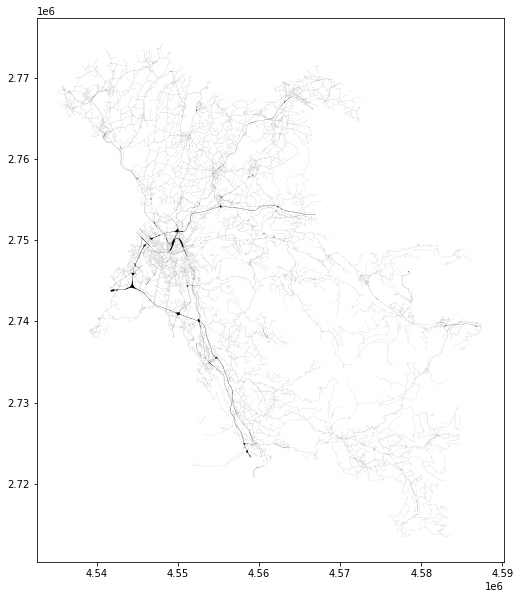

In [217]:
fig, ax = plt.subplots(1,1)
fig.set_figheight(10)
fig.set_figwidth(10)
aus_streets.plot(column='ITEM', ax=ax, color="black", linewidth=0.5, legend=True)